In [1]:
from rdkit import Chem
from rdkit.Chem import MolToSmiles

reader1 = Chem.SmilesMolSupplier("../../compounds_to_test/LOTUS_DB.smi", delimiter="\t")
mols = [mol for mol in reader1]
ids = [mol.GetProp("_Name") for mol in mols]
smiles=[MolToSmiles(mol) for mol in mols]

In [1]:
from deepmol.pipeline import Pipeline
from deepmol.loaders import CSVLoader

best_pipeline = Pipeline.load('../sm_predictor_pipeline_tpe_sklearn/trial_285')

train = CSVLoader("../results_for_new_dataset/train.csv",
                        labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
                                        'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
                                        'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
                                        'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
                                        'C09762'],
                        id_field="ids", smiles_field="smiles").create_dataset()
valid = CSVLoader("../results_for_new_dataset/valid.csv",
                    labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
                                    'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
                                    'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
                                    'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
                                    'C09762'],
                    id_field="ids", smiles_field="smiles").create_dataset()
test = CSVLoader("../results_for_new_dataset/test.csv",
                    labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
                                    'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
                                    'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
                                    'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
                                    'C09762'],
                    id_field="ids", smiles_field="smiles").create_dataset()

2024-10-08 15:11:57.520873: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 15:11:57.520919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 15:11:57.523039: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 15:11:57.533642: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-08 15:11:58.561715: W tensorflow/comp

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
/home/jcapela/miniforge3/envs/sm_precursor_predictor/lib/python3.10/site-packages/deepmol/compound_featurization/__init__.py:20: UserWarning: Mol2Vec not available. Please install it to use it. (pip install git+https://github.com/samoturk/mol2vec#egg=mol2vec)
  warnings.warn("Mol2Vec not available. Please install it to use it. "


2024-10-08 15:12:04,124 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!
2024-10-08 15:12:04,219 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!
2024-10-08 15:12:04,257 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!


In [2]:
dataset = train.merge([valid, test])
best_pipeline.fit(dataset)

2024-10-08 15:12:04,269 — ERROR — Features are not the same length/type... Recalculate features for all inputs!
2024-10-08 15:12:04,271 — ERROR — Features are not the same length/type... Recalculate features for all inputs!


LayeredFingerprint: 100%|██████████| 1418/1418 [00:10<00:00, 130.13it/s]


In [4]:


from tqdm import tqdm
bar = tqdm(total=len(smiles))

import numpy as np
from deepmol.datasets import SmilesDataset

predictions = []
last_i = 0

import rdkit.rdBase as rkrb
import rdkit.RDLogger as rkl
logger = rkl.logger()
logger.setLevel(rkl.ERROR)
rkrb.DisableLog('rdApp.error')

for i in range(10000, len(smiles), 10000):
    lotus_dataset = SmilesDataset(smiles=smiles[last_i:i], ids=ids[last_i:i])
    prediction = best_pipeline.predict(lotus_dataset)
    if i == 10000:
        predictions = prediction
    else:
        predictions = np.concatenate((predictions, prediction))

    last_i += 10000
    bar.update(10000)


lotus_dataset = SmilesDataset(smiles=smiles[last_i:], ids=ids[last_i:])
prediction = best_pipeline.predict(lotus_dataset)
predictions = np.concatenate((predictions, prediction))

  0%|          | 0/276517 [00:00<?, ?it/s]

 98%|█████████▊| 270000/276517 [14:22<00:20, 324.94it/s]

In [5]:
labels = np.array(['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
       'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
       'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
       'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
       'C09762'])

labels_ = {
    'C00341': 'Geranyl diphosphate',
    'C01789': 'Campesterol',
    'C00078': 'Tryptophan',
    'C00049': 'L-Aspartate',
    'C00183': 'L-Valine',
    'C03506': 'Indoleglycerol phosphate',
    'C00187': 'Cholesterol',
    'C00079': 'L-Phenylalanine',
    'C00047': 'L-Lysine',
    'C01852': 'Secologanin',
    'C00407': 'L-Isoleucine',
    'C00129': 'Isopentenyl diphosphate',
    'C00235': 'Dimethylallyl diphosphate',
    'C00062': 'L-Arginine',
    'C00353': 'Geranylgeranyl diphosphate',
    'C00148': 'L-Proline',
    'C00073': 'L-Methionine',
    'C00108': 'Anthranilate',
    'C00123': 'L-Leucine',
    'C00135': 'L-Histidine',
    'C00448': 'Farnesyl diphosphate',
    'C00082': 'L-Tyrosine',
    'C00041': 'L-Alanine',
    'C00540': 'Cinnamoyl-CoA',
    'C01477': 'Apigenin',
    'C05903': 'Kaempferol',
    'C05904': 'Pelargonin',
    'C05905': 'Cyanidin',
    'C05908': 'Delphinidin',
    'C00389': 'Quercetin',
    'C01514': 'Luteolin',
    'C09762': "Liquiritigenin",
    'C00509': 'Naringenin',
    'C00223': 'p-Coumaroyl-CoA'
}

labels_names = np.array([labels_[label] for label in labels])
labels_names

array(['L-Methionine', 'Tryptophan', 'L-Phenylalanine', 'L-Tyrosine',
       'Dimethylallyl diphosphate', 'Geranyl diphosphate',
       'Geranylgeranyl diphosphate', 'Farnesyl diphosphate',
       'Campesterol', 'Indoleglycerol phosphate', 'L-Lysine',
       'Anthranilate', 'Cholesterol', 'L-Proline', 'L-Alanine',
       'Isopentenyl diphosphate', 'L-Arginine', 'Secologanin',
       'L-Aspartate', 'L-Histidine', 'p-Coumaroyl-CoA', 'Naringenin',
       'Cinnamoyl-CoA', 'Apigenin', 'Kaempferol', 'Pelargonin',
       'Cyanidin', 'Delphinidin', 'Liquiritigenin'], dtype='<U26')

In [6]:
ones = predictions == 1
labels_all = []
for i, prediction in enumerate(ones):
    labels_all.append(";".join(labels_names[prediction]))

In [7]:
import pandas as pd
pd.DataFrame({"ID": ids, "SMILES": smiles, "Labels": labels_all}).to_csv("lotus_predictions.csv", index=False)

In [3]:
import json 

with open("lotus.json", "r") as f:
    lotus_db = json.load(f)

In [13]:
filtered_for_plants = []
for compound in lotus_db:
    only_key = list(lotus_db[compound]["taxonomy"].keys())[0]
    if "GBIF Backbone Taxonomy" in lotus_db[compound]["taxonomy"][only_key]:
        taxonomies = lotus_db[compound]["taxonomy"][only_key]["GBIF Backbone Taxonomy"]
        for taxonomy in taxonomies:
            if "kingdom" not in taxonomy:
                pass
            else:
                if taxonomy["kingdom"] == "Plantae":
                    filtered_for_plants.append(compound)
    
    elif "NCBI" in lotus_db[compound]["taxonomy"][only_key]:
        taxonomies = lotus_db[compound]["taxonomy"][only_key]["NCBI"]
        for taxonomy in taxonomies:
            if "kingdom" not in taxonomy:
                pass
            else:
                if taxonomy["kingdom"] == "Viridiplantae":
                    filtered_for_plants.append(compound)
    elif "ITIS" in lotus_db[compound]["taxonomy"][only_key]:
        taxonomies = lotus_db[compound]["taxonomy"][only_key]["ITIS"]
        for taxonomy in taxonomies:
            if "kingdom" not in taxonomy:
                pass
            else:
                if taxonomy["kingdom"] == "Plantae":
                    filtered_for_plants.append(compound)
    elif "Open Tree of Life" in lotus_db[compound]["taxonomy"][only_key]:
        taxonomies = lotus_db[compound]["taxonomy"][only_key]["Open Tree of Life"]
        for taxonomy in taxonomies:
            if "phylum" not in taxonomy:
                pass
            else:
                if taxonomy["phylum"] == "Streptophyta":
                    filtered_for_plants.append(compound)
    elif "iNaturalist" in lotus_db[compound]["taxonomy"][only_key]:
        taxonomies = lotus_db[compound]["taxonomy"][only_key]["iNaturalist"]
        for taxonomy in taxonomies:
            if "kingdom" not in taxonomy:
                pass
            else:
                if taxonomy["kingdom"] == "Plantae":
                    filtered_for_plants.append(compound)
        


In [10]:
lotus_db_predictions = pd.read_csv("lotus_predictions.csv")

lotus_db_predictions_plants = lotus_db_predictions[lotus_db_predictions["ID"].isin(filtered_for_plants)]
lotus_db_predictions_plants.to_csv("LOTUSDB_predictions_plants.csv", index=False)
lotus_db_predictions_plants.shape

(190273, 3)

In [3]:
import pandas as pd

lotus_db_predictions_plants = pd.read_csv("LOTUSDB_predictions_plants.csv")
lotus_db_predictions_plants

,ID,SMILES,Labels
0,LTS0124597,CC(=O)OC1C(OC2C(OC3CC(O)CC4=CCC5C6CC7OC8(CCC(C...,Cholesterol
1,LTS0121510,C[C@H](CO)[C@H]1OC(=O)C=C2C1=C[C@H]1OC(=O)[C@]...,Geranylgeranyl diphosphate
2,LTS0110032,CS(=O)(=O)C=CCO,NaN
3,LTS0116501,CC1C(=O)OC2(C)C1C(=O)OC1CCN3CC=C(COC(=O)C2(C)O...,L-Proline;L-Arginine
4,LTS0256634,CC1=CC(=O)[C@H](O)[C@@]2(C)C[C@H]3OC(=O)C(C)=C...,NaN
...,...,...,...
190268,LTS0200952,O=C(OCC1=C[C@@H](O)[C@H]2C=CO[C@H](O[C@@H]3O[C...,Geranyl diphosphate
190269,LTS0059294,C=C1C[C@@H]2OC(=O)[C@H](C)[C@H]2[C@@H](O)/C=C(...,Farnesyl diphosphate
190270,LTS0083019,COC(=O)C1=CO[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)...,Geranyl diphosphate
190271,LTS0117662,CCc1c(OC)oc(CCCCCCCCCC(C)O)c(C)c1=O,NaN


In [7]:
from deepmol.datasets import SmilesDataset

smiles=lotus_db_predictions_plants.SMILES
ids=lotus_db_predictions_plants.ID
last_i=0
for i in range(10000, len(smiles), 10000):
    lotus_dataset = SmilesDataset(smiles=smiles[last_i:i], ids=ids[last_i:i])
    prediction = best_pipeline.predict(lotus_dataset)
    if i == 10000:
        predictions = prediction
    else:
        predictions = np.concatenate((predictions, prediction))

    last_i += 10000
    bar.update(10000)


lotus_dataset = SmilesDataset(smiles=smiles[last_i:], ids=ids[last_i:])
prediction = best_pipeline.predict(lotus_dataset)
predictions = np.concatenate((predictions, prediction))

LayeredFingerprint:  13%|█▎        | 1258/10000 [00:21<02:27, 59.45it/s] 


KeyboardInterrupt: 

In [7]:
lotus_db_predictions_plants.set_index("ID", inplace=True)
for i, compound in lotus_db_predictions_plants.iterrows():
    chemical_ontology = lotus_db[i]["chemical_ontology"]
    if "chemicalTaxonomyNPclassifierPathway" in chemical_ontology:
        pathway = chemical_ontology["chemicalTaxonomyNPclassifierPathway"]
        lotus_db_predictions_plants.loc[i, "Pathway"] = pathway
    if "chemicalTaxonomyNPclassifierSuperclass" in chemical_ontology:
        superclass = chemical_ontology["chemicalTaxonomyNPclassifierSuperclass"]
        lotus_db_predictions_plants.loc[i, "Superclass"] = superclass
    if "chemicalTaxonomyNPclassifierClass" in chemical_ontology:
        class_ = chemical_ontology["chemicalTaxonomyNPclassifierClass"]
        lotus_db_predictions_plants.loc[i, "Class"] = class_
    if "chemicalTaxonomyClassyfireClass" in chemical_ontology:
        class_ = chemical_ontology["chemicalTaxonomyNPclassifierClass"]
        lotus_db_predictions_plants.loc[i, "ClassyFire"] = class_

    

In [124]:
mask = lotus_db_predictions_plants.loc[:, "Pathway"].str.contains("Terpenoids")
mask.fillna(False, inplace=True)
phenylpropanoids = lotus_db_predictions_plants[mask]
phenylpropanoids.fillna("", inplace=True)
phenylpropanoids[phenylpropanoids["Labels"].str.contains("Cholesterol")].iloc[100:104, ]

/tmp/ipykernel_38842/3712848464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phenylpropanoids.fillna("", inplace=True)


,SMILES,Labels,Pathway,Superclass,Class,ClassyFire
ID,,,,,,
LTS0112028,CC1CCC2(OC1)OC1CC3C4CCC5CC(OC6OC(CO)C(OC7OC(C)...,Cholesterol,Terpenoids,Steroids,Spirostane steroids,Spirostane steroids
LTS0259162,C[C@@H]1CC[C@@]2(OC1)O[C@H]1C[C@@H]3[C@@H]4CC=...,Cholesterol,Terpenoids,Steroids,Spirostane steroids,Spirostane steroids
LTS0119495,CC(C)=CCC1OC23CC4(CO2)C(CCC2C5(C)CCC(O[C@@H]6O...,Farnesyl diphosphate;Cholesterol,Terpenoids,Triterpenoids,Dammarane and Protostane triterpenoids,Dammarane and Protostane triterpenoids
LTS0050384,C[C@@H]1CC[C@@]2(OC1)O[C@H]1C[C@H]3[C@@H]4CC[C...,Cholesterol,Terpenoids,Steroids,Spirostane steroids,Spirostane steroids


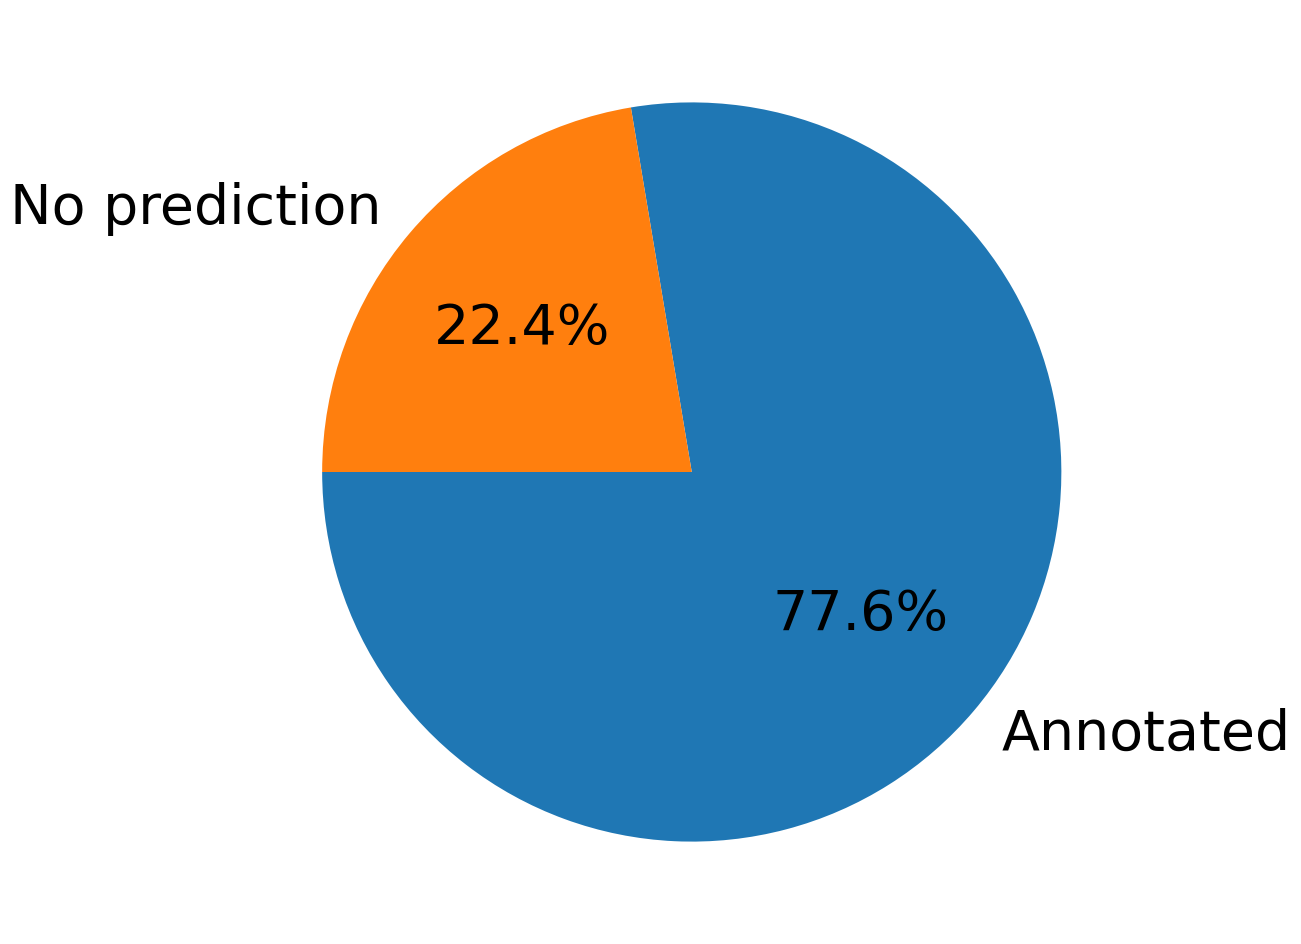

In [77]:
# make a pie chart of the predicted precursors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

counts = {}
for i, compound in lotus_db_predictions_plants.iterrows():
    if pd.isna(compound["Labels"]):
        if "No prediction" not in counts:
            counts["No prediction"] = 1
        else:
            counts["No prediction"] += 1
    else:
        if "Annotated" not in counts:
            counts["Annotated"] = 1
        else:
            counts["Annotated"] += 1

# Sort counts and get the top 10
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
top_labels = [item[0] for item in counts.items()]
top_sizes = [item[1] for item in counts.items()]


# make a pie chart
plt.figure(figsize=(15, 12))
plt.pie(top_sizes, labels=top_labels, autopct='%1.1f%%', startangle=180, rotatelabels=False)

# increase the font size of the labels
for text in plt.gca().texts:
    text.set_fontsize(40)

plt.savefig('pie_chart_annotated.png', format='png', dpi=300, transparent=True)

In [5]:
top_sizes

[147716, 42557]

In [101]:

636.5
def generate_pie_chart_based_on_class(class_, number_of_labels=9, path="pie_chart.png"):
    counts = {}
    for i, compound in lotus_db_predictions_plants.iterrows():
        if not pd.isnull(compound["Pathway"]):
            if class_ in compound["Pathway"] or class_ in compound["Class"]:
                if not pd.isnull(compound["Labels"]):
                    for label in compound["Labels"].split(";"):
                        if label == "Geranylgeranyl diphosphate":
                            label = "GGPP"
                        elif label == "Geranyl diphosphate":
                            label = "GPP"
                        elif label == "Farnesyl diphosphate":
                            label = "FPP"
                            
                        if label not in counts:
                            counts[label] = 1
                        else:
                            counts[label] += 1

    # Sort counts and get the top 10
    sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
    top_labels = [item[0] for item in sorted_counts[:number_of_labels]]
    top_sizes = [item[1] for item in sorted_counts[:number_of_labels]]

    # Group the rest as "Other"
    other_size = sum(item[1] for item in sorted_counts[number_of_labels:])
    top_labels.append("Other")
    top_sizes.append(other_size)

    # make a pie chart
    plt.figure(figsize=(20, 13))
    patches, labels, pct_texts = plt.pie(top_sizes, labels=top_labels, autopct='%1.1f%%', startangle=180, rotatelabels=True)

    # increase the font size of the labels
    for text in plt.gca().texts:
        text.set_fontsize(45)

    for label, pct_text in zip(labels, pct_texts):
        pct_text.set_rotation(label.get_rotation())
        pct_text.set_fontsize(30)
        label.set_rotation(0)

    plt.savefig(path, format='png', dpi=300, transparent=True, )

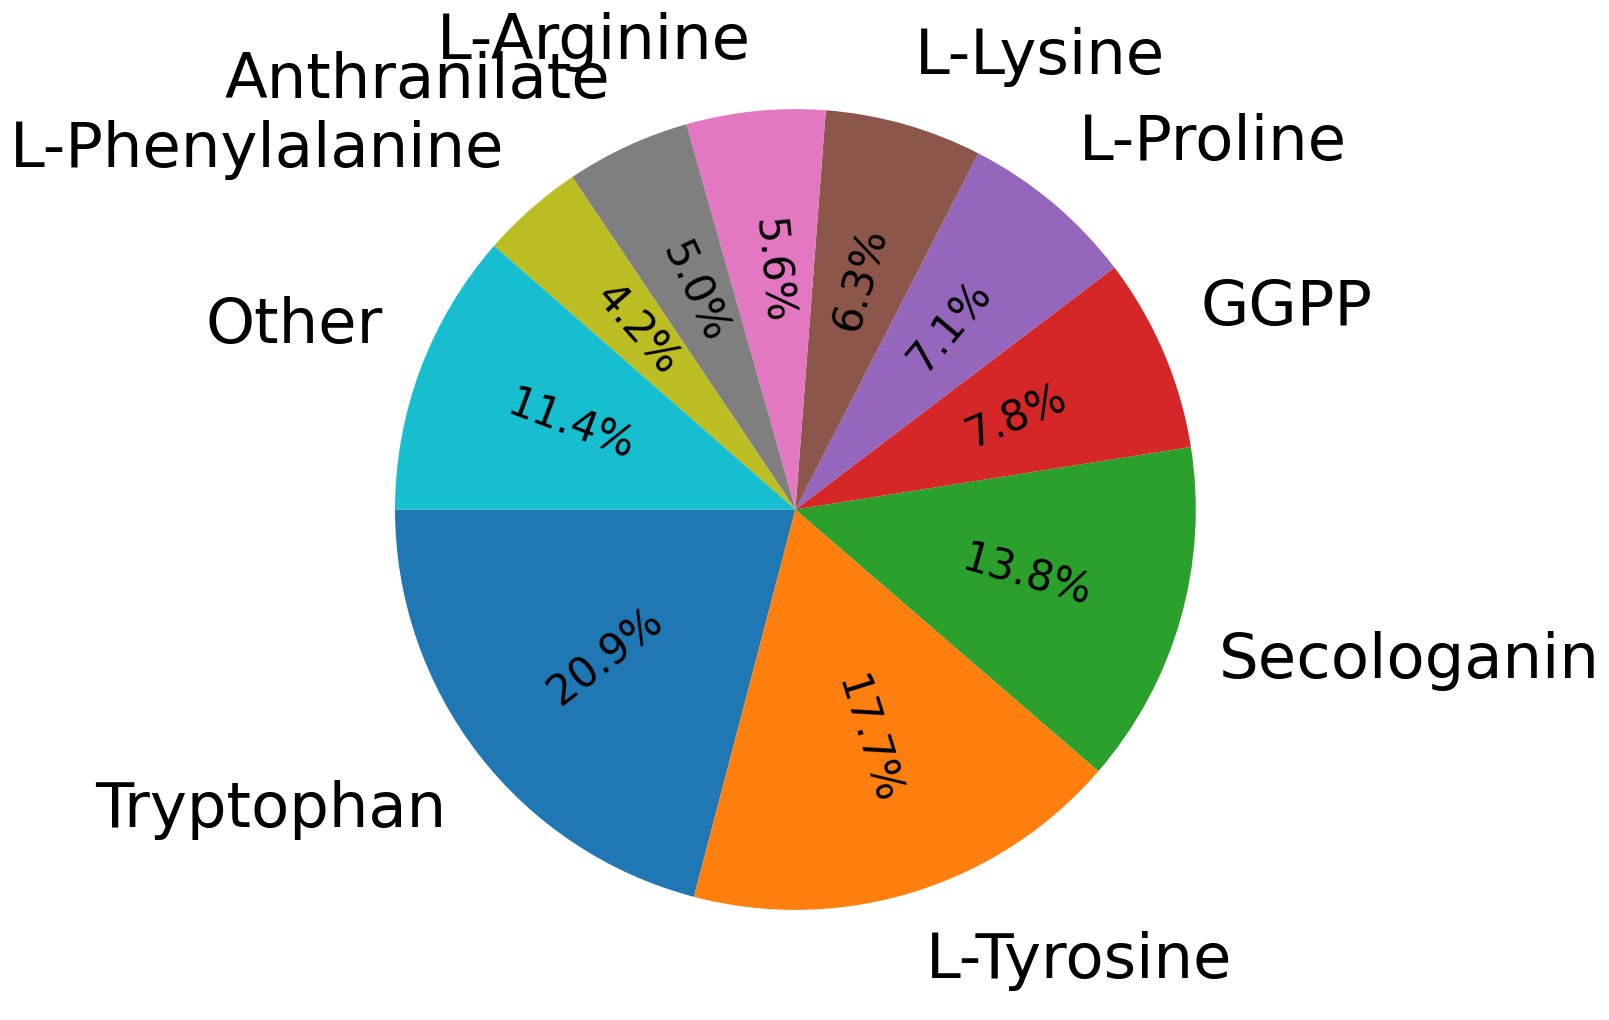

In [102]:
generate_pie_chart_based_on_class("Alkaloids", path = "alkaloids_pie.png")

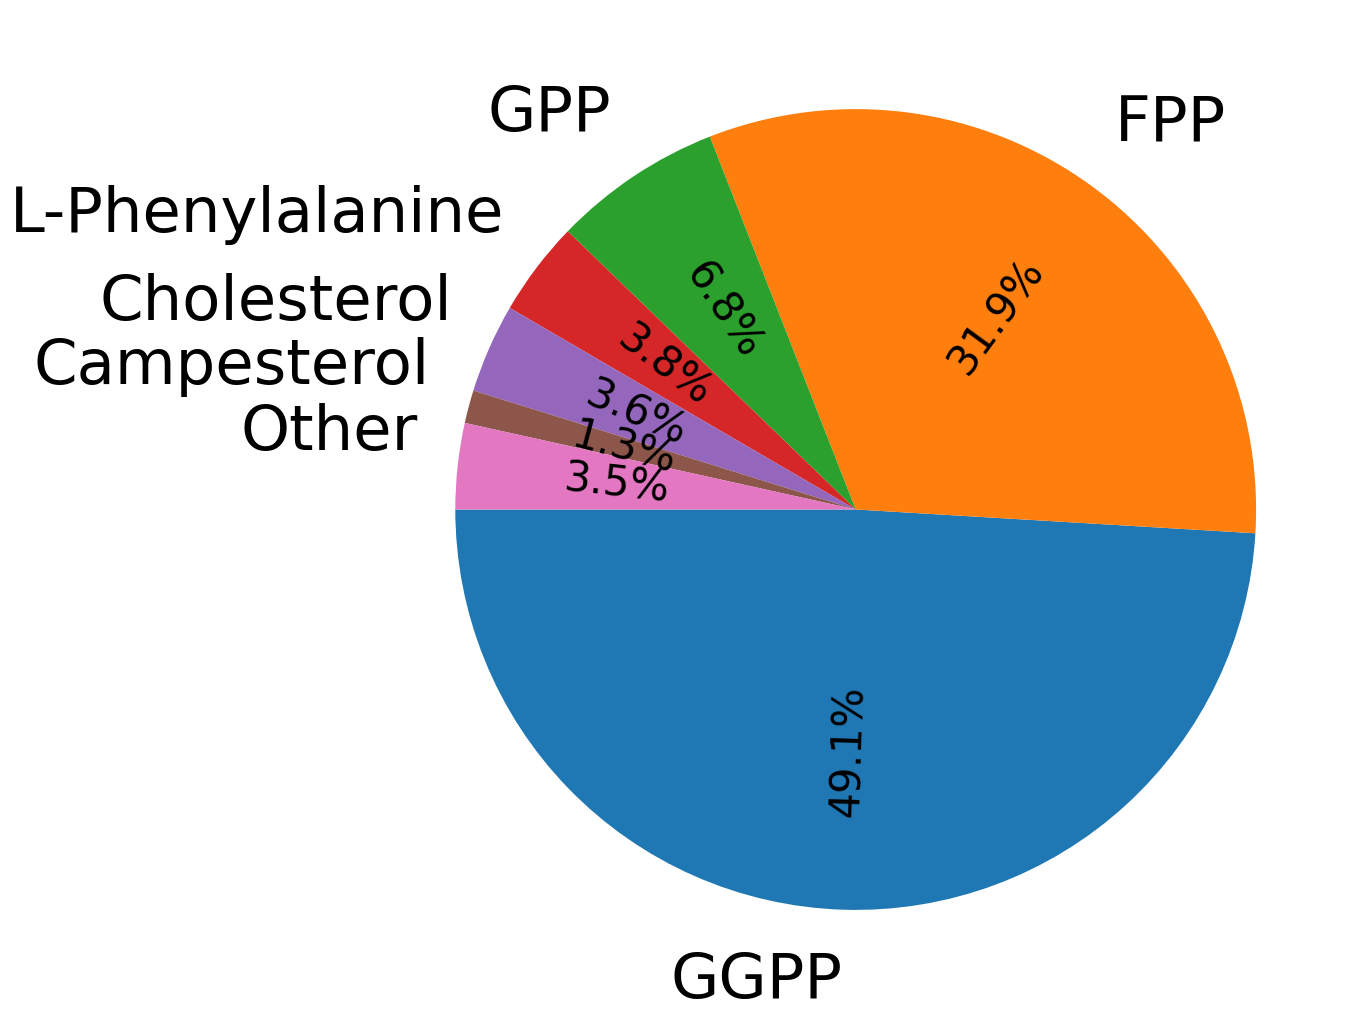

In [103]:
generate_pie_chart_based_on_class("Terpenoids", 6, path="terpenoids_pie.png", )

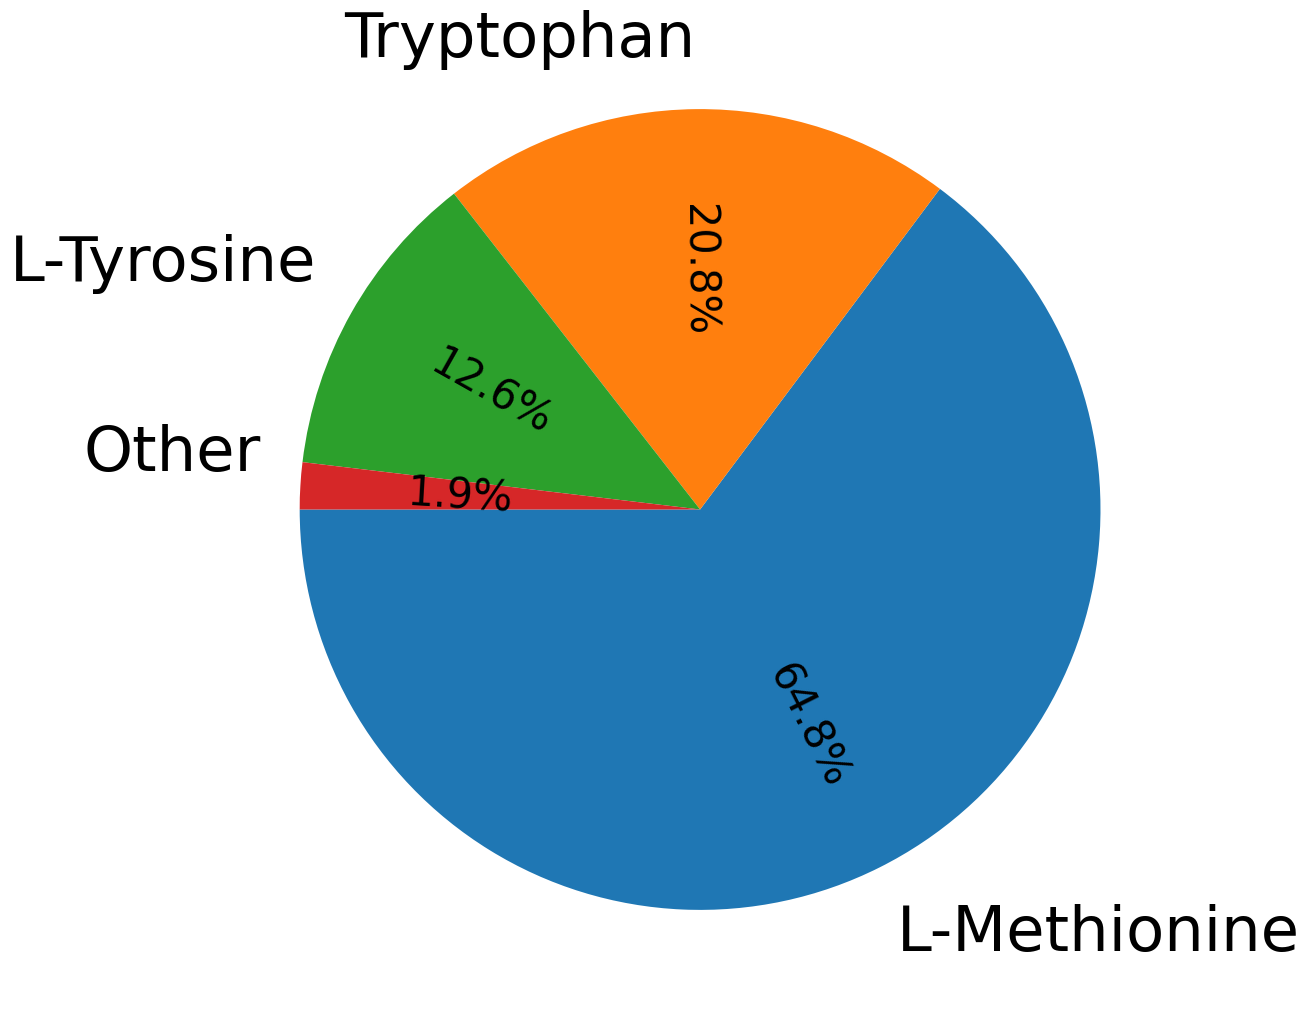

In [104]:
generate_pie_chart_based_on_class("Glucosinolates",  3, path = "glucosinolate.png")

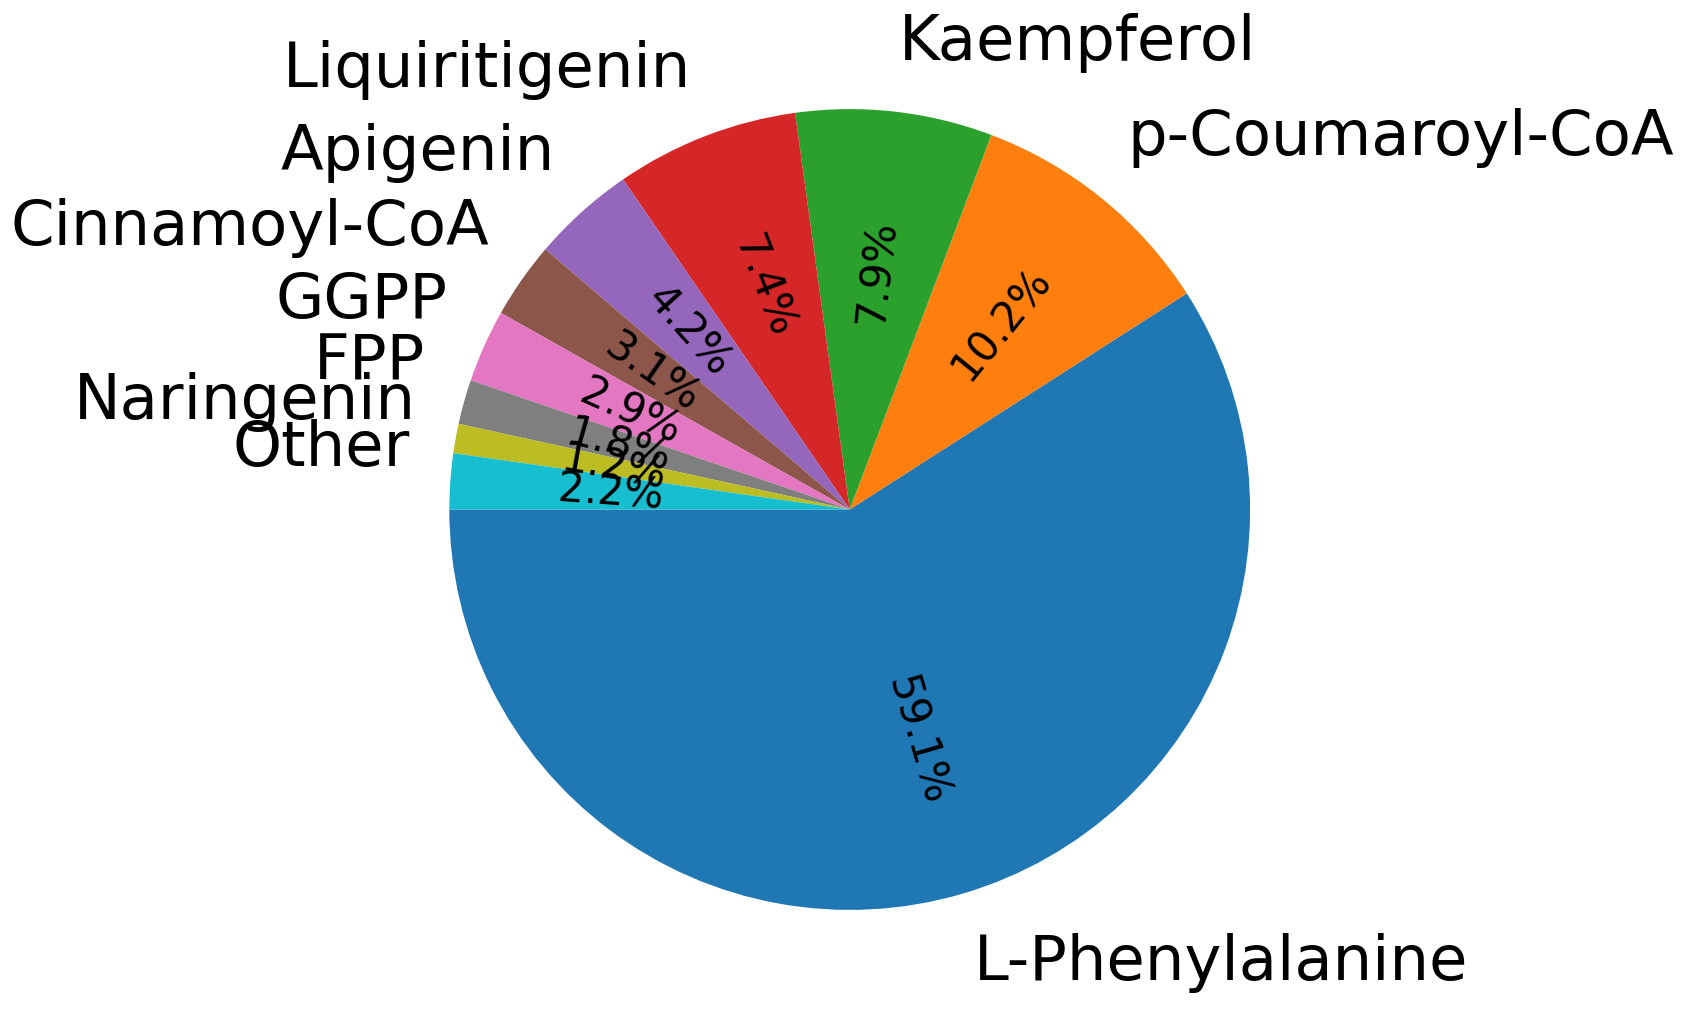

In [105]:
generate_pie_chart_based_on_class("Phenylpropanoids", 9, path="phenylpropanoid.png")

In [14]:

def generate_bar_plot_for_comopunds(counts, pallete=sns.color_palette("YlOrBr")):
    # Calculate the total count
    total_count = sum(counts.values())
    
    # Calculate percentages
    percentages = {category: (count / total_count) * 100 for category, count in counts.items()}
    
    plt.rc('font', size=14) 
    # Bar plot
    plt.bar(percentages.keys(), percentages.values(),color=pallete)
    plt.xlabel("Categories")
    plt.ylabel("Percentage")
    plt.ylim(0, 100, 10)
    plt.title("Percentage of Counts for Different Categories", pad=30)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    
    # Show the plot
    plt.show()

/tmp/ipykernel_3375660/1572222904.py:13: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 100, 10)


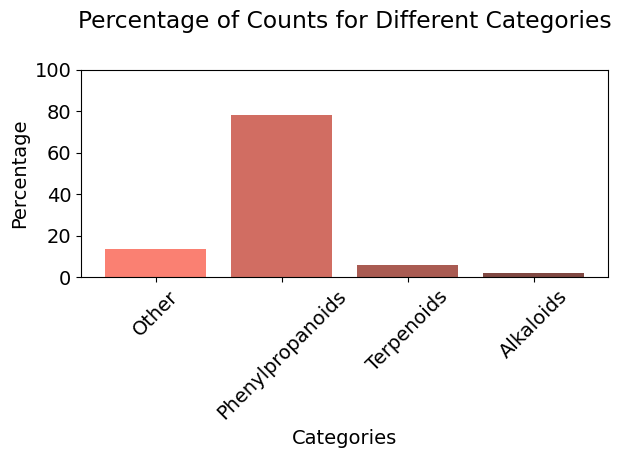

In [15]:
generate_bar_plot_for_comopunds(counts, pallete=sns.color_palette("dark:salmon_r"))

In [16]:
# from the ones that are predicted phelylalanine get the ones that are terpenes
counts = {}
for i, compound in lotus_db_predictions_plants.iterrows():
    if not pd.isnull(compound["Labels"]) and "Geranylgeranyl diphosphate" in compound["Labels"]:
        if not pd.isnull(compound["Superclass"]):
            if "diterpenoid" in compound["Superclass"].lower():
                counts["Diterpenoids"] = counts.get("Diterpenoids", 0) + 1
            elif "carotenoids" in compound["Superclass"].lower():
                counts["Carotenoids"] = counts.get("Carotenoids", 0) + 1
            elif "terpenoid" in compound["Superclass"].lower():
                counts["Other terpenoids"] = counts.get("Other terpenoids", 0) + 1
            else:
                counts["Other"] = counts.get("Other", 0) + 1


/tmp/ipykernel_3375660/1572222904.py:13: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 100, 10)


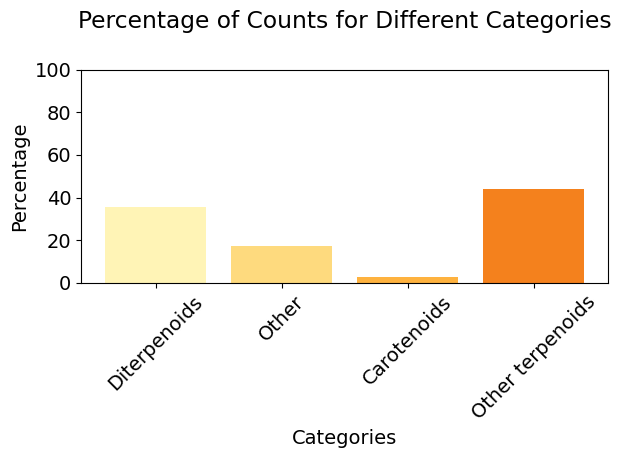

In [17]:
generate_bar_plot_for_comopunds(counts)

In [18]:
counts = {}
for i, compound in lotus_db_predictions_plants.iterrows():
    if not pd.isnull(compound["Labels"]) and "Farnesyl diphosphate" in compound["Labels"]:
        if not pd.isnull(compound["Superclass"]):
            if "triterpenoid" in compound["Superclass"].lower():
                counts["Triterpenoids"] = counts.get("Triterpenoids", 0) + 1
            elif "sesquiterpenoid" in compound["Superclass"].lower():
                counts["Sesquiterpenoid"] = counts.get("Sesquiterpenoid", 0) + 1
            elif "terpenoid" in compound["Superclass"].lower():
                counts["Other terpenoids"] = counts.get("Other terpenoids", 0) + 1
            else:
                counts["Other"] = counts.get("Other", 0) + 1

/tmp/ipykernel_3375660/1572222904.py:13: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 100, 10)


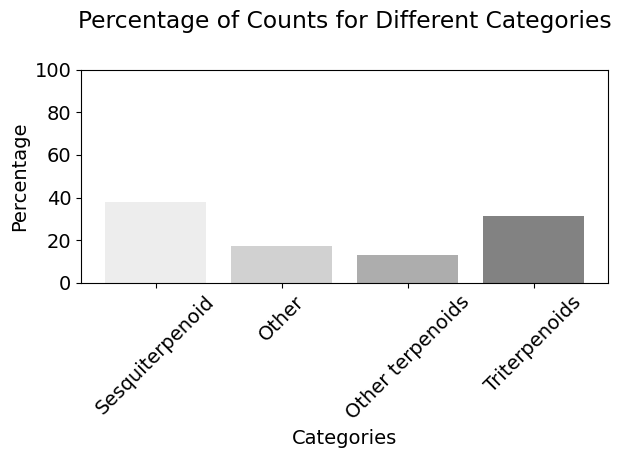

In [19]:
generate_bar_plot_for_comopunds(counts, sns.color_palette("Greys"))